In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from EB import EBplotsNEC
import matplotlib.animation as animation

from scipy import spatial
from scipy.optimize import minimize
from viresclient import set_token
from viresclient import SwarmRequest
import warnings
import matplotlib.pyplot as plt
import datetime
import arviz as az

from itertools import chain

from scipy.fft import fft, fftfreq

import xarray
from scipy import signal
from scipy import constants
import pytensor.tensor as pt
import pymc as pm
mu0 = constants.mu_0
from scipy.special import gamma, jv
import copy
import matplotlib.pyplot as plt
import mplcyberpunk
print(plt.style.available)
plt.style.use("cyberpunk")

Bad value in file WindowsPath('c:/Users/1101w/anaconda3/envs/pymc_env/Lib/site-packages/mplcyberpunk/data/cyberpunk.mplstyle'), line 24 ("axes.prop_cycle: cycler('color', ['08F7FE', 'FE53BB', 'F5D300', '00ff41', 'r', '9467bd', 'purple', '#8562f7' ])"): Key axes.prop_cycle: "cycler('color', ['08F7FE', 'FE53BB', 'F5D300', '00ff41', 'r', '9467bd', 'purple', '" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file WindowsPath('c:/Users/1101w/anaconda3/envs/pymc_env/Lib/site-packages/arviz/plots/styles/cyberpunk.mplstyle'), line 24 ("axes.prop_cycle: cycler('color', ['08F7FE', 'FE53BB', 'F5D300', '00ff41', 'r', '9467bd', 'purple', '#8562f7' ])"): Key axes.prop_cycle: "cycler('color', ['08F7FE', 'FE53BB', 'F5D300', '00ff41', 'r', '9467bd', 'purple', '" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'arviz-bluish', 'arviz-brownish', 'arviz-colors', 'arviz-cyanish', 'arviz-darkgrid', 'arviz-doc', 'arviz-docgrid', 'arviz-grayscale', 'arviz-greenish', 'arviz-orangish', 'arviz-plasmish', 'arviz-purplish', 'arviz-redish', 'arviz-royish', 'arviz-viridish', 'arviz-white', 'arviz-whitegrid', 'bmh', 'classic', 'cyberpunk', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
warnings.filterwarnings('ignore')

In [214]:
dict={'time_range': (datetime.datetime(2021, 9, 24, 3, 46), datetime.datetime(2021, 9, 24, 3, 48)),
       'satellite_graph': ['swarma'], 'coordinate_system': ['North East Centre'], 'graph_B_chosen': ['East'],
         'B_frequency': ['50Hz'], 'E_frequency': ['16Hz'], 'graph_E_chosen': ['North'], 'graph_PF_chosen': None, 'FAC': False,
           'Difference': False, 'E_B_ratio': True, 'Pixel_intensity': False, 'sky_map_values': None, 'bandpass': [True, [0, 7.9]], 'heatmap': None,
             'conductivities': None, 'animation': False, 'Time_Series': None, 'E_periodogram': None, 'B_periodogram': None, 'EB_periodogram': None,
               'sampling_rate': None, 'window_length': None, 'EB_cross power': None, 'EB_cross phase': None, 'lags_cross': None, 'nperseg': 'half window length',
                 'lag': False, 'time_range_single': (datetime.datetime(2021, 9, 24, 3, 46, 51), datetime.datetime(2021, 9, 24, 3, 47,4)),
                   'singles_graph': ['E_North', 'B_East', 'ENorth/BEast ratio', 'EEast/BNorth ratio'], 'pixel_average': None, "E_difference":None, "B_difference": None, "PF_difference": None}

Token saved for https://vires.services/ows
{'time_range': (datetime.datetime(2021, 9, 24, 3, 46), datetime.datetime(2021, 9, 24, 3, 48)), 'satellite_graph': ['swarma'], 'coordinate_system': ['North East Centre'], 'graph_B_chosen': ['East'], 'B_frequency': ['50Hz'], 'E_frequency': ['16Hz'], 'graph_E_chosen': ['North'], 'graph_PF_chosen': None, 'FAC': False, 'Difference': False, 'E_B_ratio': True, 'Pixel_intensity': False, 'sky_map_values': None, 'bandpass': [True, [0, 7.9]], 'heatmap': None, 'conductivities': None, 'animation': False, 'Time_Series': None, 'E_periodogram': None, 'B_periodogram': None, 'EB_periodogram': None, 'sampling_rate': None, 'window_length': None, 'EB_cross power': None, 'EB_cross phase': None, 'lags_cross': None, 'nperseg': 'half window length', 'lag': False, 'time_range_single': (datetime.datetime(2021, 9, 24, 3, 46, 51), datetime.datetime(2021, 9, 24, 3, 47, 4)), 'singles_graph': ['E_North', 'B_East', 'ENorth/BEast ratio', 'EEast/BNorth ratio'], 'pixel_average':

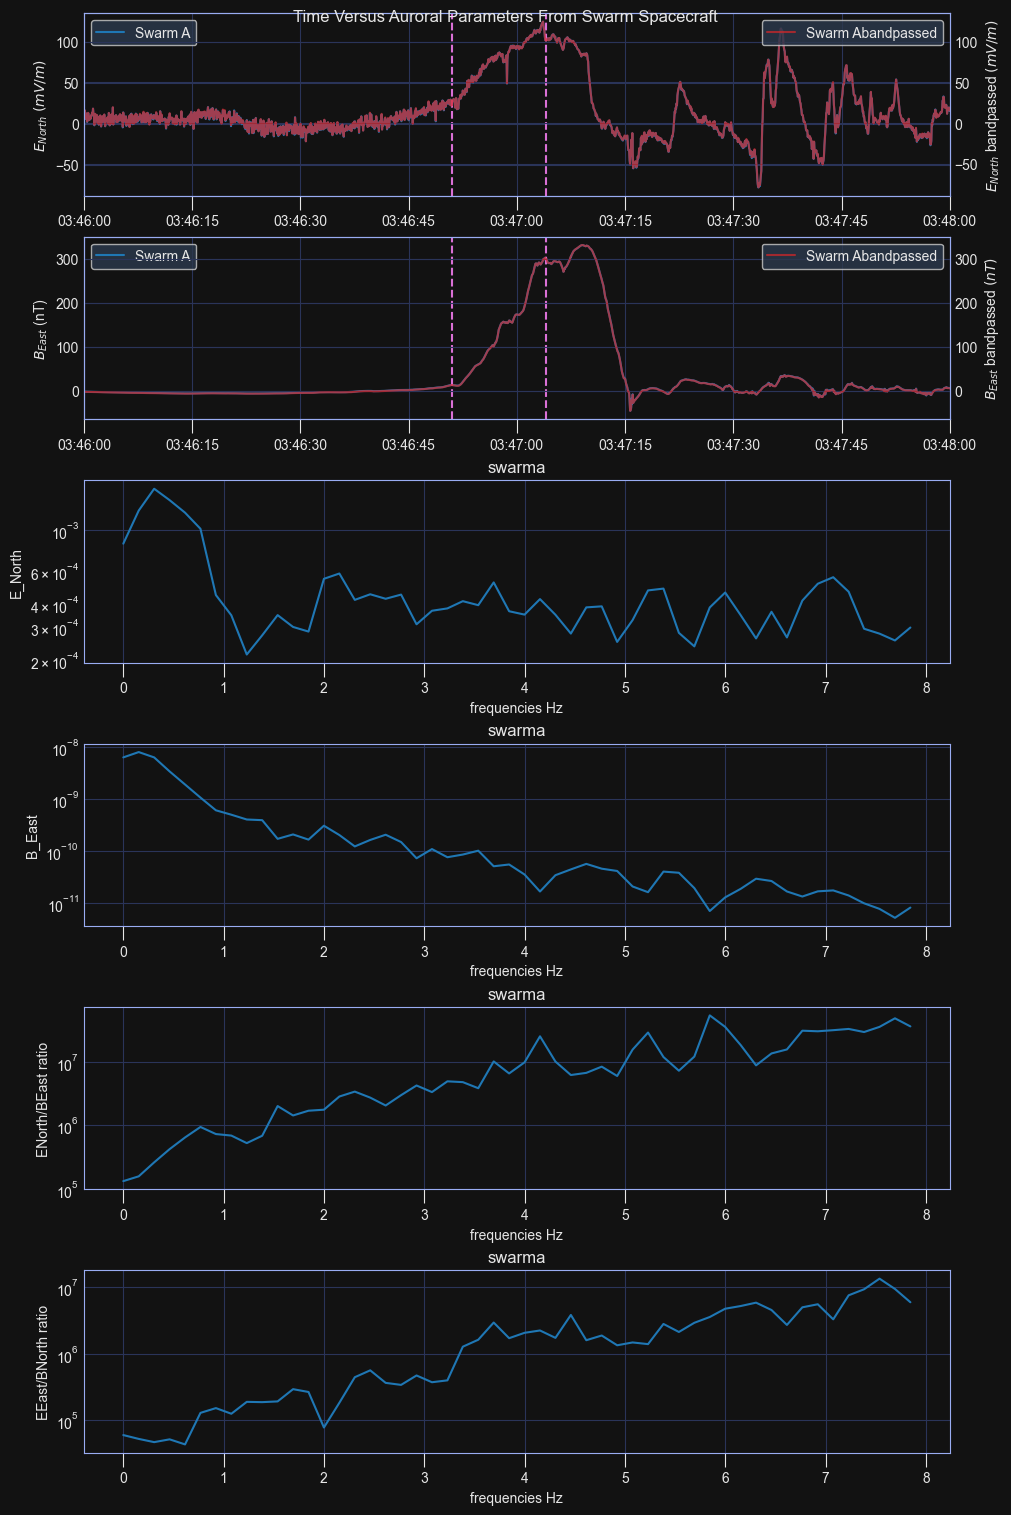

In [215]:
fig,axes,data = EBplotsNEC(dict)
fig.show()


In [216]:
fig.clear()

In [217]:
Alfven_speed=[]
conducitivies=[]
print(np.shape(data))
for i in range(1):
    if dict['bandpass'][0] == True:
        bandpass=np.where((np.real(data[i, 0, 0, 0, :]) >= dict['bandpass'][1][0]) & (np.real(data[i, 0, 0, 0, :]) <= dict['bandpass'][1][1]))[0]
    else: 
        bandpass =np.where(np.real((data[i, 0, 0, 0, :]) >= 0))[0]
    print(1/(1.256e-6*data[i, 0,  3, 0, bandpass][0]))
    print(1/(1.256e-6*data[i, 0,  3, 1, bandpass][0])) 
    print("Conductivies of each satlelite from each polarization")
    conducitivies.append(1/(1.256e-6*np.absolute(data[i, 0,  3, 0, bandpass][0])))
    Alfven_speed.append(np.mean(np.absolute(data[i, 0,  3, 0, bandpass])))
print(np.array(Alfven_speed)/1.5e6, Alfven_speed)
powerspec =  np.delete(np.absolute(data[i, 0, 3, 0, bandpass]),0)
omega= np.delete(np.real(data[0,0,0,0,bandpass]), 0)
print(omega)
np.savetxt('frequencies.csv', omega, delimiter=",")
np.savetxt('powerspectrum.csv', powerspec, delimiter=',')
np.savetxt('conducitivies.csv', conducitivies, delimiter=",")
np.savetxt('Alfven.csv', Alfven_speed, delimiter=',')

(1, 1, 8, 2, 104)
(6.038062602096425+0j)
(13.304447563974447+0j)
Conductivies of each satlelite from each polarization
[8.04406143] [12066092.147558056]
[0.15384615 0.30769231 0.46153846 0.61538462 0.76923077 0.92307692
 1.07692308 1.23076923 1.38461538 1.53846154 1.69230769 1.84615385
 2.         2.15384615 2.30769231 2.46153846 2.61538462 2.76923077
 2.92307692 3.07692308 3.23076923 3.38461538 3.53846154 3.69230769
 3.84615385 4.         4.15384615 4.30769231 4.46153846 4.61538462
 4.76923077 4.92307692 5.07692308 5.23076923 5.38461538 5.53846154
 5.69230769 5.84615385 6.         6.15384615 6.30769231 6.46153846
 6.61538462 6.76923077 6.92307692 7.07692308 7.23076923 7.38461538
 7.53846154 7.69230769 7.84615385]


In [218]:
idata = az.from_netcdf(r"C:\Users\1101w\Documents\GitHub\Physics_Work\Aurora_Work\convergencetest.nc")

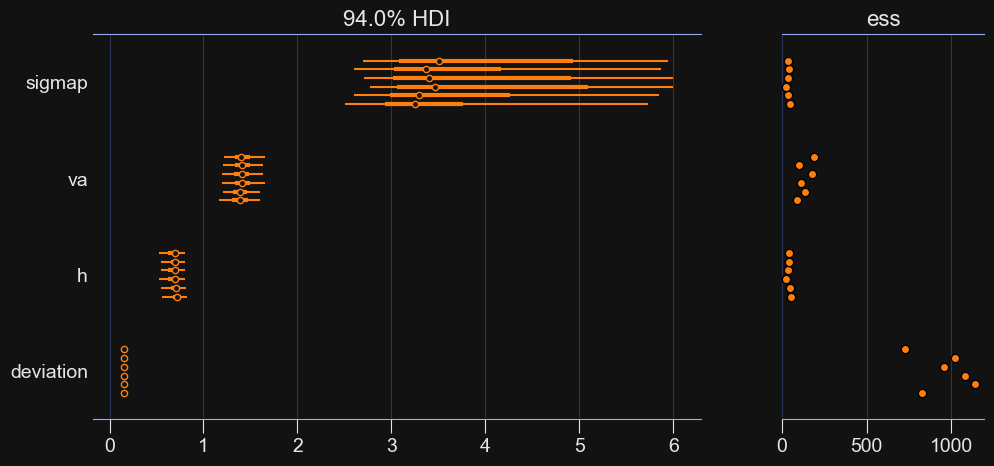

In [219]:
ax = az.plot_forest(
    idata,
    var_names=["sigmap", "va", "h", "deviation"],
    figsize=(11.5, 5),
    colors="C1",
    ess=True,
    # r_hat=True,
)


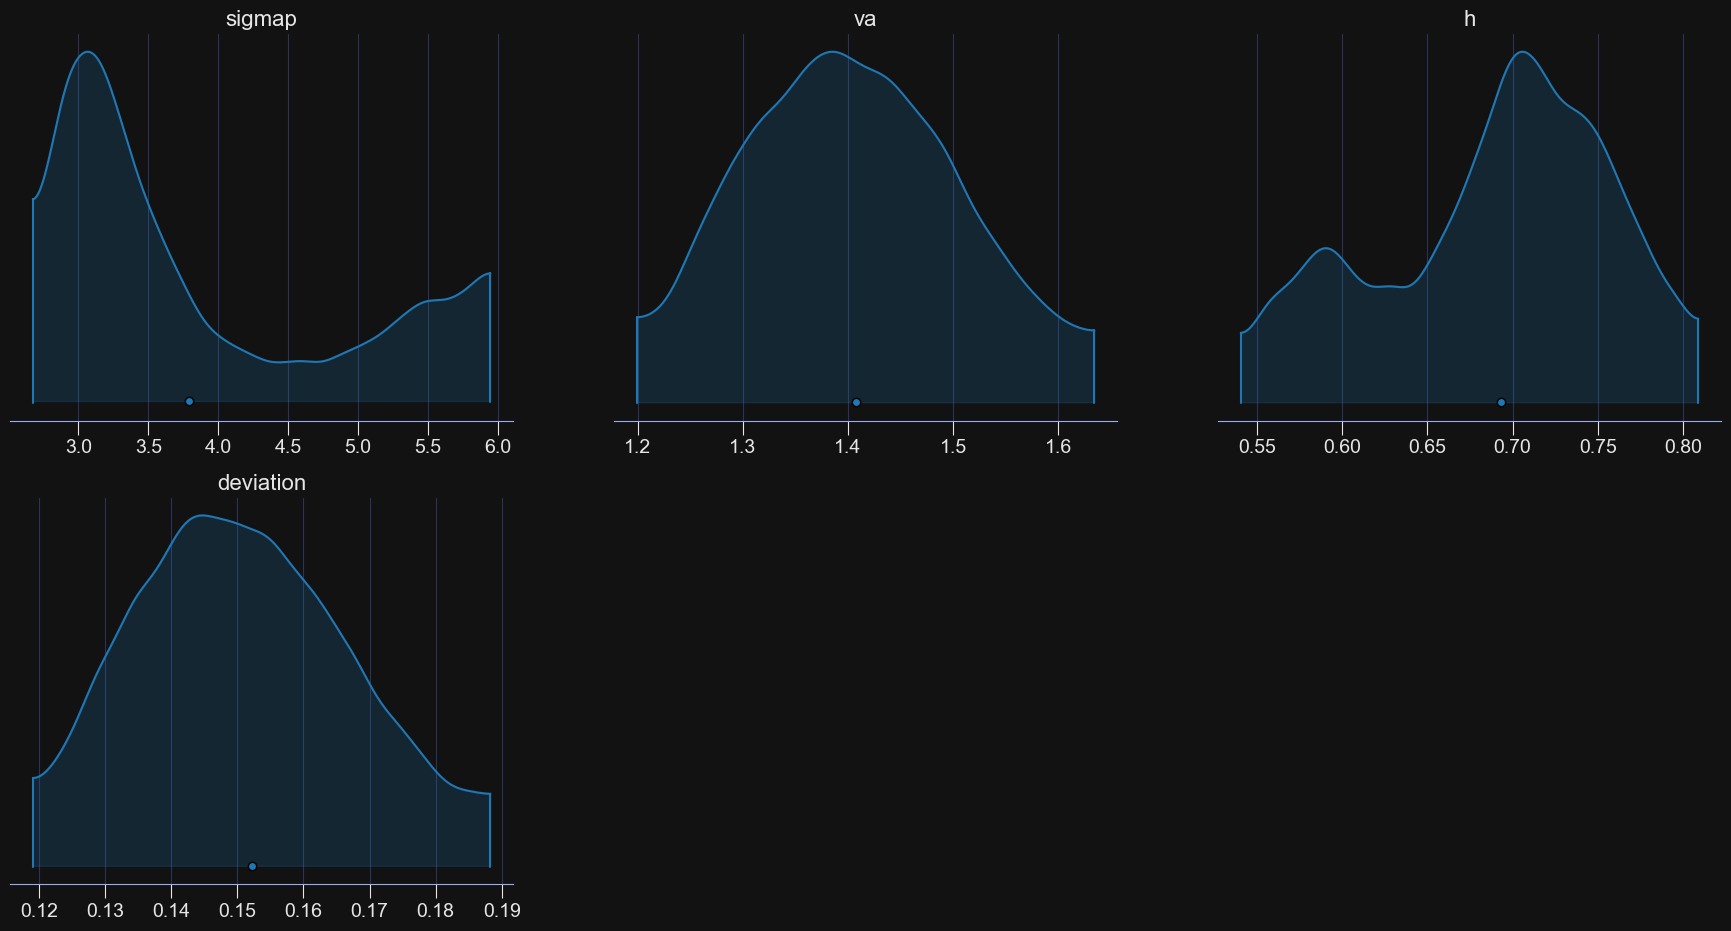

In [220]:
axes = az.plot_density(
    [idata],
    data_labels=["Centered"],
    var_names=["sigmap", "va", "h", "deviation"],
    shade=0.2,
)


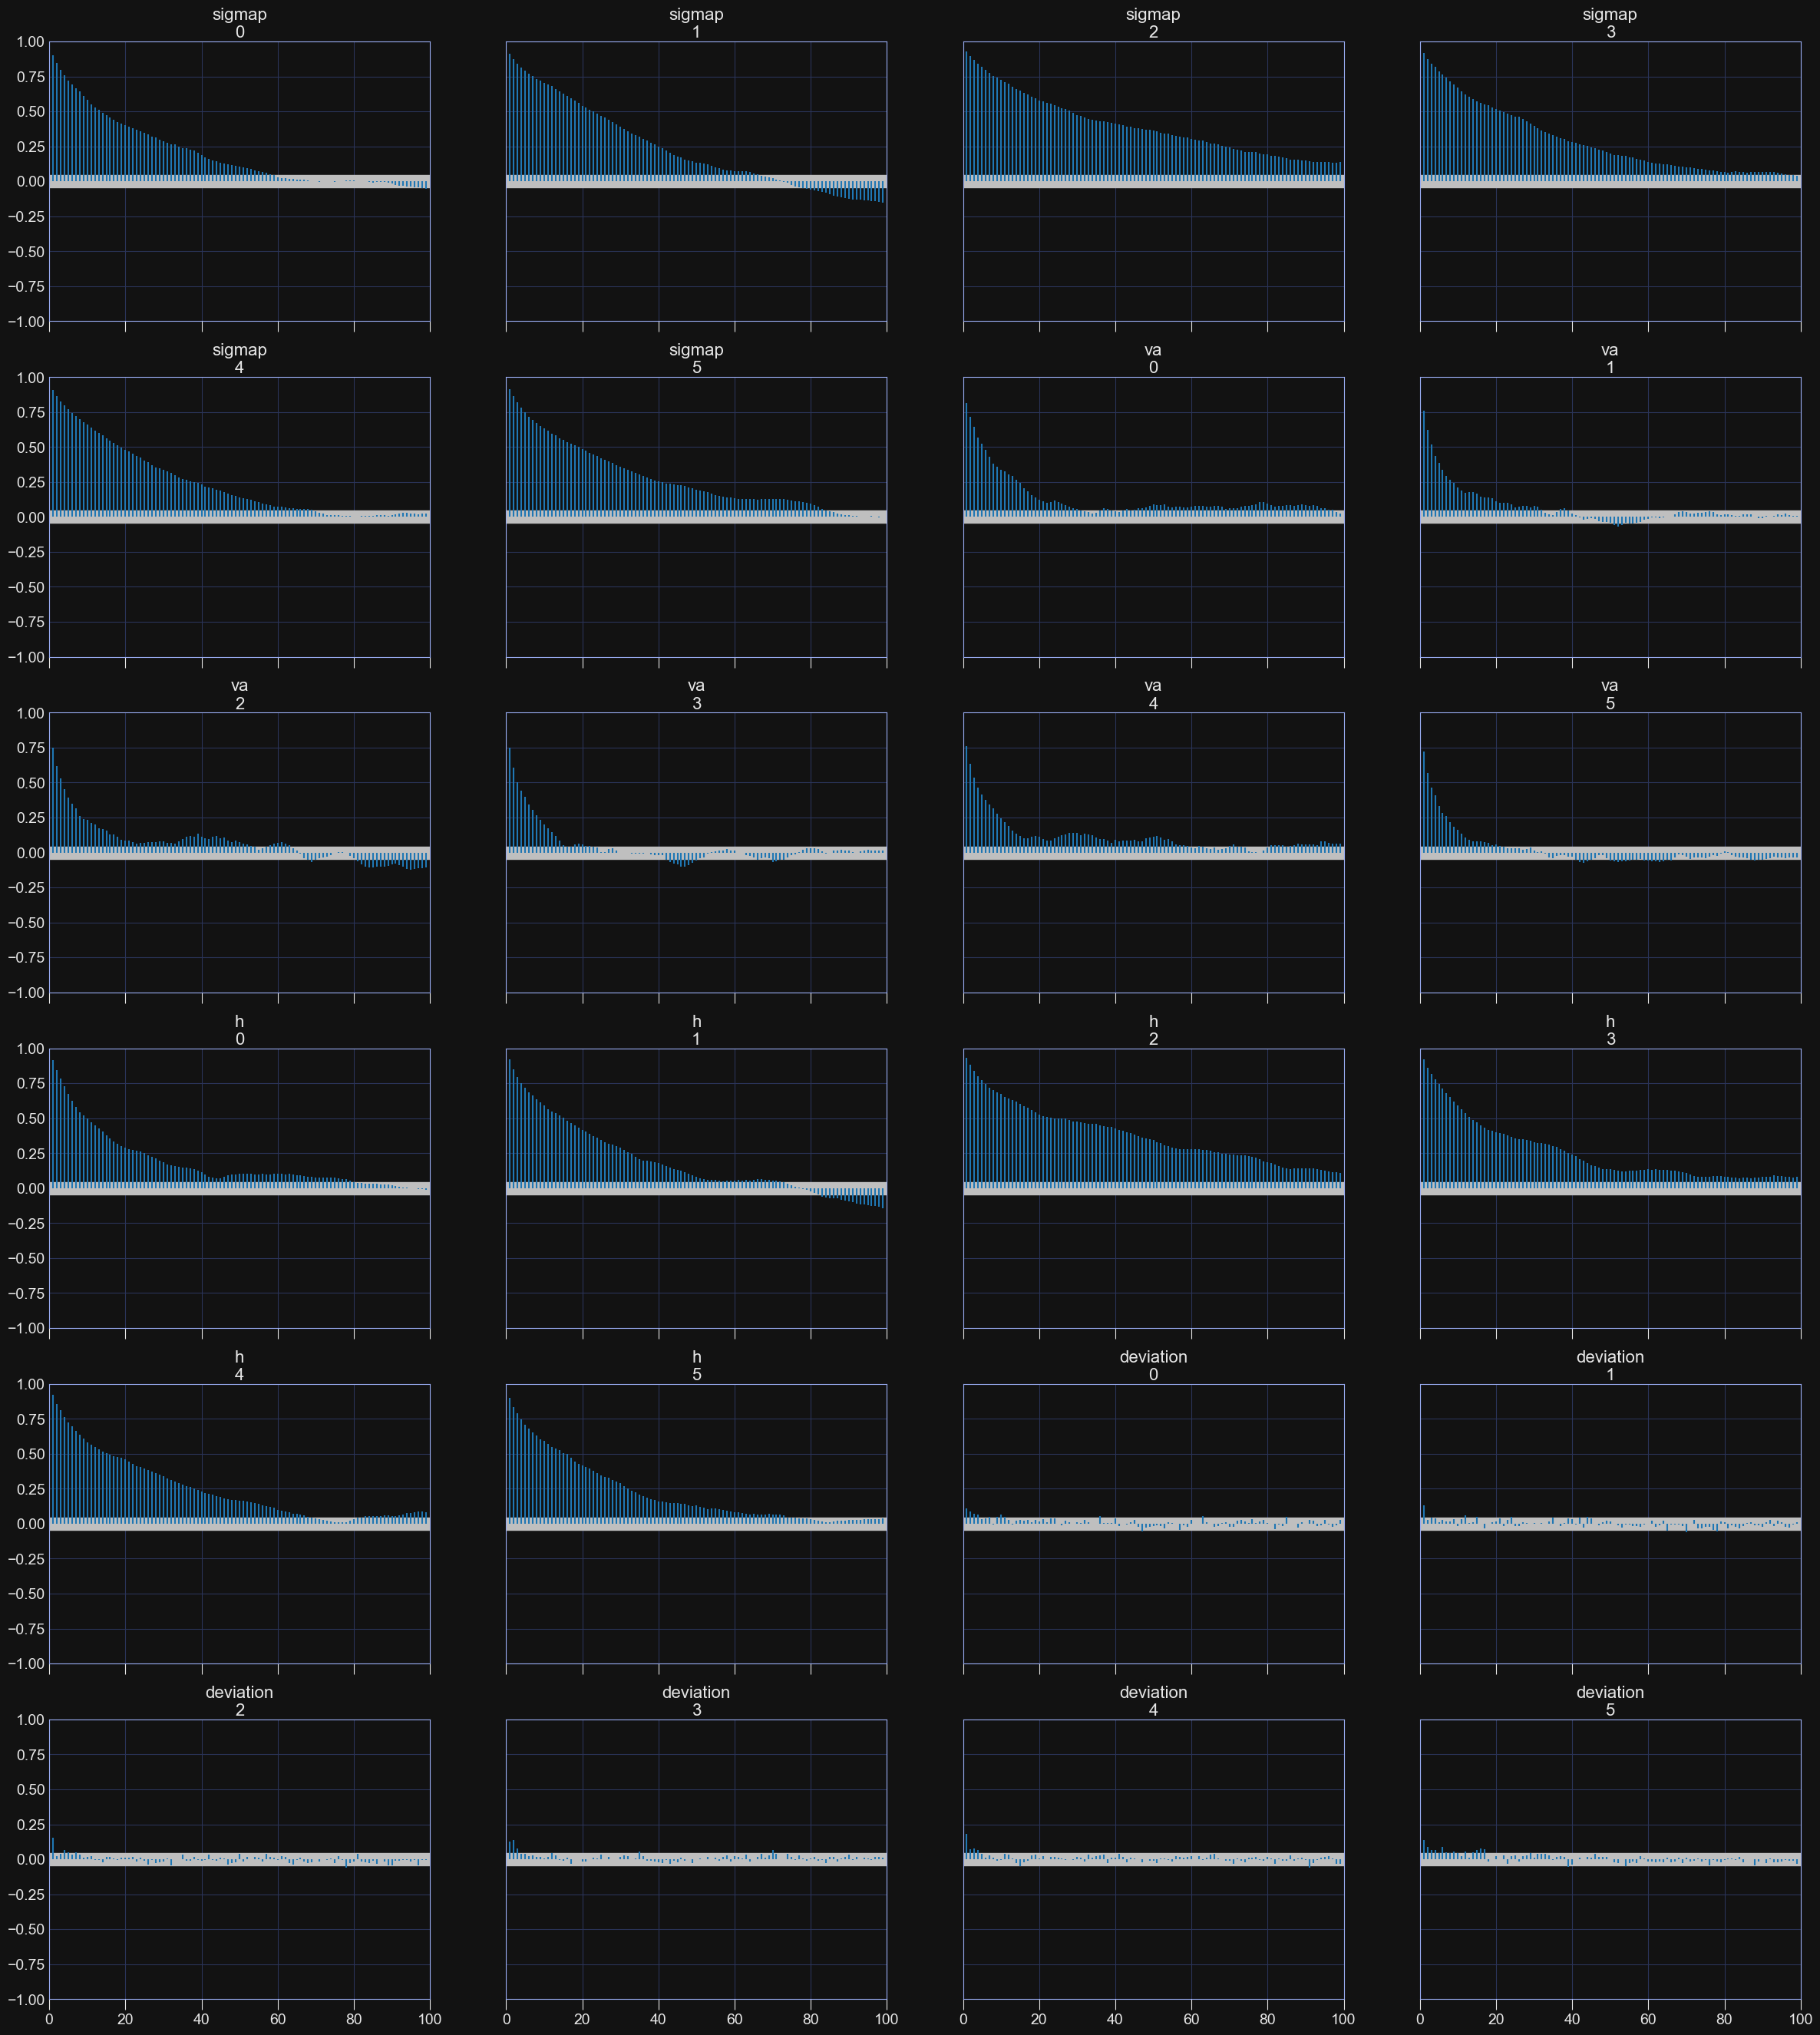

In [221]:
az.plot_autocorr(idata, var_names=(["sigmap", "va", "h", "deviation"]))
plt.show()

array([[<Axes: title={'center': 'sigmap'}>,
        <Axes: title={'center': 'sigmap'}>],
       [<Axes: title={'center': 'va'}>, <Axes: title={'center': 'va'}>],
       [<Axes: title={'center': 'h'}>, <Axes: title={'center': 'h'}>],
       [<Axes: title={'center': 'deviation'}>,
        <Axes: title={'center': 'deviation'}>]], dtype=object)

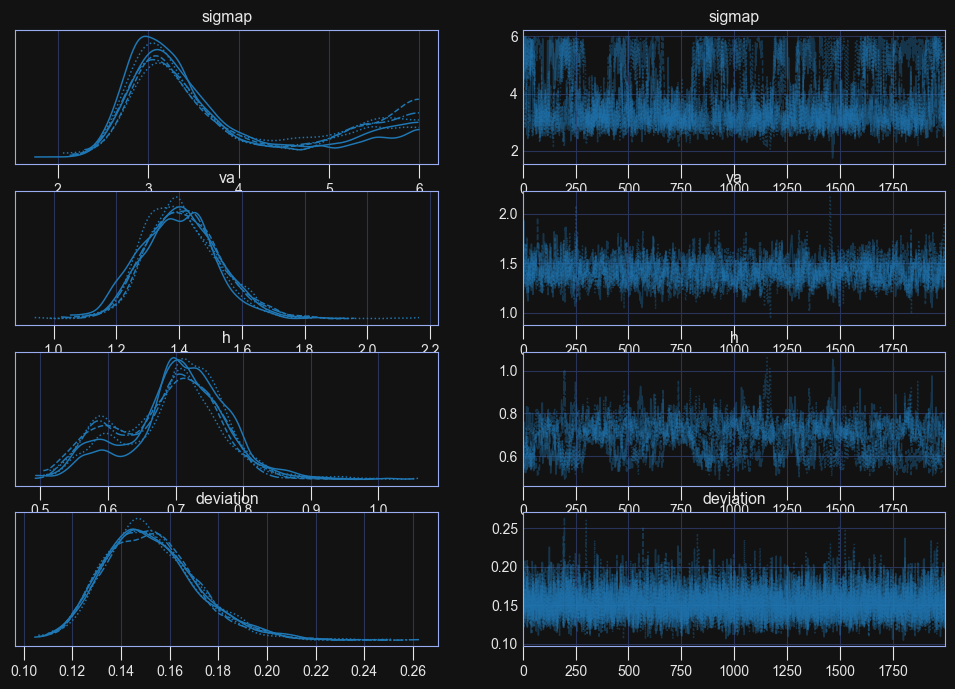

In [222]:
az.plot_trace(idata)